In [5]:
import tensorflow as tf
print(tf.__version__)

2.1.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [11]:
# Build the Sequential feedforward neural network model

model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16,activation='relu',name='layer_1'),
    Dense(16,activation='relu'),
    Dense(10),
    Softmax()
])

In [12]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [47]:
# Build the Sequential convolutional neural network model
model=Sequential([
    Conv2D(16,(3,3), activation='relu',input_shape=(28,28,1),data_format='channels_last'),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10,activation='softmax')
])


In [32]:
# Print the model summary

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [21]:
# Define the model optimizer, loss function and metrics

opt=tf.keras.optimizers.Adam(learning_rate=0.005)

model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy','mae'])

In [22]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x0000023920154188>, <tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x000002391D082608>]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [13]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [14]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [15]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [16]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [17]:
# Rescale the image values so that they lie in between 0 and 1.

train_images=train_images/255.
test_images=test_images/255.

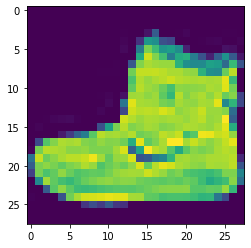

label 123:Ankle boot  


In [18]:
# Display one of the images

i=0
img=train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label 123:{labels[train_labels[i]]}  ")

In [26]:
train_images[...,np.newaxis].shape
train_labels.shape

(60000,)

#### Fit the model

In [27]:
# Fit the model

# history=model.fit(train_images[...,np.newaxis],train_labels,epochs=8,batch_size=256,verbose=1)
history=model.fit(train_images[...,np.newaxis],train_labels,epochs=8,batch_size=256,verbose=1)

ValueError: Error when checking input: expected flatten_input to have 3 dimensions, but got array with shape (60000, 28, 28, 1)

#### Plot training history

In [65]:
# Load the history into a pandas Dataframe

df= pd.DataFrame(history.history)
df.head()

,loss,accuracy,mae
0,0.325669,0.885683,4.420000
1,0.310759,0.889067,4.420001
2,0.298308,0.892467,4.420001
3,0.287717,0.896683,4.420000
4,0.283809,0.897050,4.419998


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

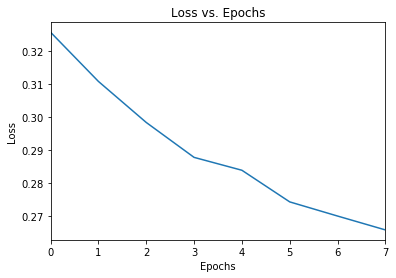

In [66]:
# Make a plot for the loss
loss_plot=df.plot(y='loss',title='Loss vs. Epochs',legend=False)
loss_plot.set(xlabel='Epochs',ylabel='Loss')

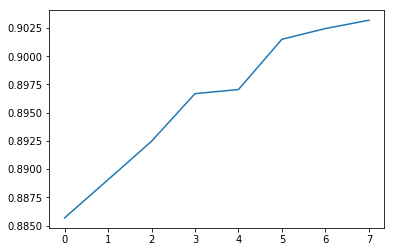

In [75]:
# Make a plot for the accuracy

plt.plot(history.history['accuracy'])

In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [76]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [79]:
# Evaluate the model

test_loss, test_accuracy,test_mae= model.evaluate(test_images[...,np.newaxis],test_labels,verbose=2)

10000/1 - 5s - loss: 0.3290 - accuracy: 0.8924 - mae: 4.4200


#### Make predictions from the model

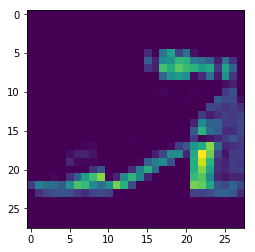

Label: Sandal


In [80]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [87]:
# Get the model predictions

prediction=model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"model prediction: {labels[np.argmax(prediction)]}")

NameError: name 'predction' is not defined